In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2

In [96]:
#Read images of expression
face_img0 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//angry//22.jpg")
face_img1 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//disgust//299.jpg")
face_img2 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//fear/2.jpg")
face_img3 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//happy/7.jpg")
face_img4 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//neutral/4.jpg")
face_img5 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//sad/3.jpg")
face_img6 = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//surprise/15.jpg")

In [97]:
faces = [face_img0, face_img1, face_img2, face_img3, face_img4, face_img5, face_img6]
facial_expression = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

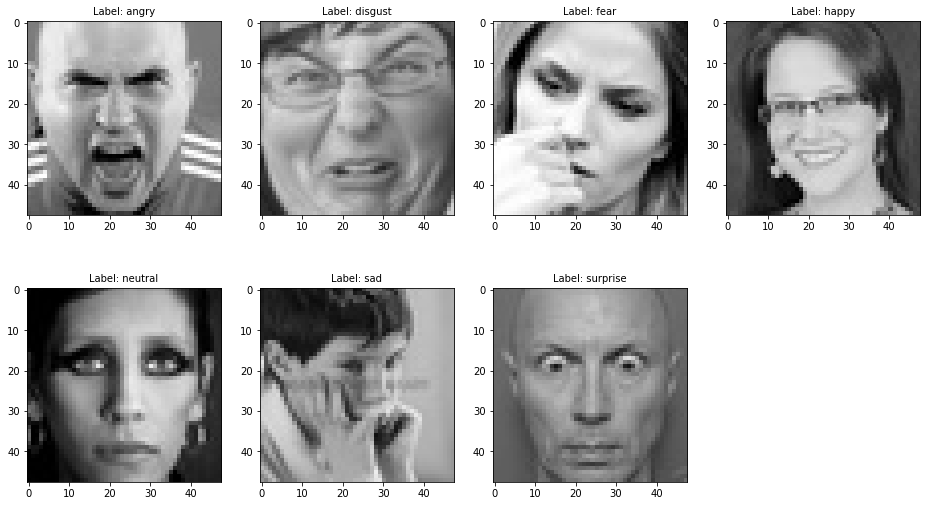

In [98]:
# subplotting displaying multiple plots as a single image plot
plt.figure(figsize = (16,9))
for index, (image,label) in enumerate(zip(faces [:], facial_expression[:])):
    # No. of rows = 2 X no.of columns = 4
    plt.subplot(2, 4, index + 1)
    plt.imshow(image, cmap = 'gray')
    plt.title("Label: %s" %label, fontsize = 10)
plt.show()

In [99]:
face_img0.shape

(48, 48, 3)

### Image Augumentation
1. All RGB Image data will used to form New Samples for Training
2. New Samples will be transformed using Image Data Generator
3. Images will be resampled using Normalization (Divide each pixels by 255) , Shear Range, Zoom Range, Brightness etc.

In [100]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [101]:
img = cv2.imread("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//happy/303.jpg")

In [102]:
samples = expand_dims(img, axis=0)

In [103]:
samples.shape

(1, 48, 48, 3)

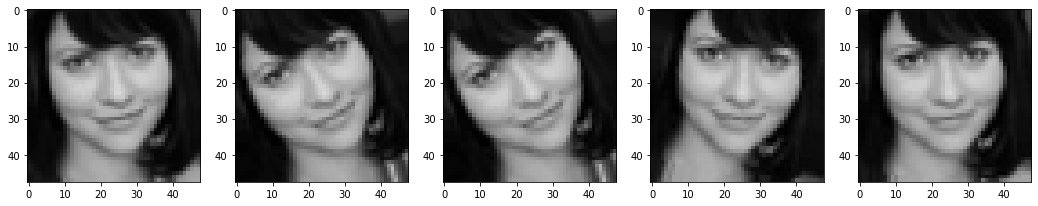

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [104]:
# Rotation of Image Data

datagen = ImageDataGenerator(rotation_range=25)

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (18,18))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

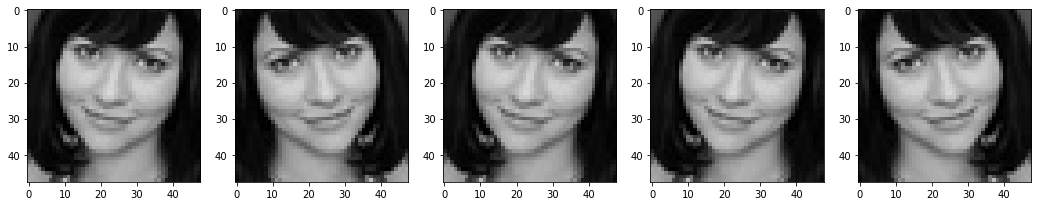

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [105]:
# Horizontal flip of Image Data

datagen = ImageDataGenerator(horizontal_flip=True)

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (18,18))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

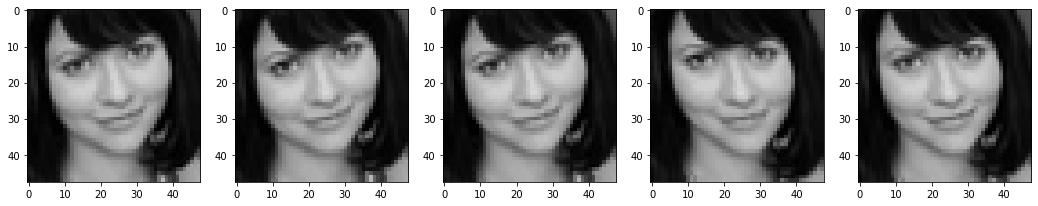

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [106]:
# Shear Change of Image Data

datagen = ImageDataGenerator(shear_range = 5)

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (18,18))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

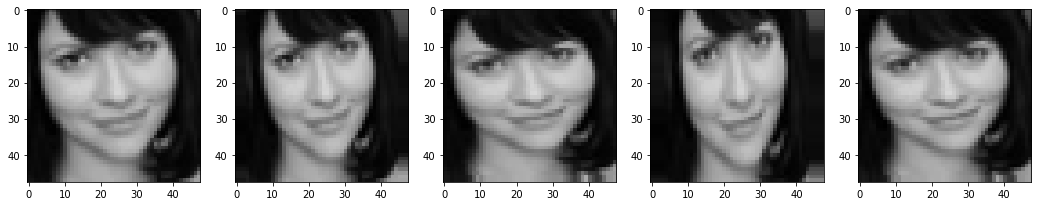

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [107]:
# Zoom Change of Image Data

datagen = ImageDataGenerator(zoom_range= 0.2)

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize = (18,18))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

In [108]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode='nearest', 
                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [109]:
training_set = train_datagen.flow_from_directory(
                    'C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//train//', 
                    target_size=(64,64), 
                    batch_size=32, 
                    class_mode='categorical')

validation_set = train_datagen.flow_from_directory(
                    'C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//validation//', 
                    target_size=(64,64), 
                    batch_size=32, 
                    class_mode='categorical')

Found 57642 images belonging to 7 classes.
Found 14132 images belonging to 7 classes.


In [110]:
training_set.image_shape 

(64, 64, 3)

In [111]:
training_set.class_indices 

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

### Building the CNN Model

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [113]:
def build_model():
    # Feed Foreward NN
    model = Sequential()
    
    # Conv2D - I
    # Padding = 'same' : This is zero padding
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same', 
                     input_shape = training_set.image_shape))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    
    # Conv2D - II
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
              
    # Conv2D - III
    model.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
              
    # Conv2D - IV
    model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
              
    # Flatten 
    model.add(Flatten())
              
    # Full Connected layer (FC)
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 7, activation = 'softmax'))
    
    # Learning rate 
    adam_optimizer = Adam(learning_rate = 0.001)
    
    # loss = categorical_crossentropy
    model.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [114]:
model = build_model() 

In [115]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 256)       

In [116]:
# Callbacks 
from tensorflow.keras import callbacks 
filepath = "C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//FaceExpr_Best_Model.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only = True, mode = 'min', 
                                      verbose = 1)
checkpoint

### steps_per_epoch = training_set.n//training_set.batch_size


In [117]:
# IMPLEMENTING LIVE DETECTION OF FACE expression
from tensorflow.keras.preprocessing import image
import datetime

model.load_weights("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//FaceExpr_Best_Model.hdf5")

color_dict={0:(0,255,0),1:(255,0,0),2:(153,0,153),3:(0,0,255),4:(125,125,125),5:(147,20,255),6:(255,0,255)}

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("C://Users//utkar//OneDrive//Documents//GitHub//Face-Detection-and-Emotion-Recognition//IPJcomp//haarcascade_frontalface_default.xml")

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(64,64,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred = np.argmax(model.predict(test_image)[0], axis=-1)
        if pred==0:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Angry',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Disgust',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==2:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Fear',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==3:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Happy',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==4:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Neutral',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==5:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Sad',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==6:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Surprise',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
            
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()